In [1]:
#Base Libraries
import os 
import sys
import json
import csv

#Core Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygwalker as pyg
import datetime as dt
#Model Libraries
from bertopic import BERTopic
from sklearn.metrics.pairwise import cosine_similarity
from umap import UMAP
#import umap.plot
from sentence_transformers import SentenceTransformer

#ML Libraries
import torch 
import pygwalker as pyg

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

In [2]:

#Importing Configs
# Define the path where config.py is located
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
Word2Vec_Models = config.Word2Vec_models

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [3]:
Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
Model_Folder = config.texts
Model_Folder = Model_Folder + Model_Subfolder

In [4]:
freq_ts = pd.read_csv(f"{Word2Vec_Models}/{Body}/{Model}/keyword_info_ts.csv")
freq_ts_m = freq_ts.copy(deep=True)
freq_ts_m["Year-Month"] = pd.to_datetime(freq_ts_m["Year-Month-Day"])
freq_ts_m['Year-Month'] = freq_ts_m['Year-Month'].dt.to_period('M')
freq_ts_m = freq_ts_m.drop(columns=['Year-Month-Day', 'Type'])
freq_ts_m = freq_ts_m.groupby(['Year-Month', 'Keyword']).sum()
print(freq_ts_m.head())

freq_ts_m = freq_ts_m.reset_index()
print(freq_ts_m.columns)

                         Frequency
Year-Month Keyword                
2002-06    bank                 20
           inflation            51
           interest             10
           market               42
           unemployment          7
Index(['Year-Month', 'Keyword', 'Frequency'], dtype='object')


[Text(0, 0, '2002-06'),
 Text(1, 0, '2002-07'),
 Text(2, 0, '2002-08'),
 Text(3, 0, '2002-09'),
 Text(4, 0, '2002-10'),
 Text(5, 0, '2002-11'),
 Text(6, 0, '2002-12'),
 Text(7, 0, '2003-01'),
 Text(8, 0, '2003-02'),
 Text(9, 0, '2003-03'),
 Text(10, 0, '2003-04'),
 Text(11, 0, '2003-05'),
 Text(12, 0, '2003-06'),
 Text(13, 0, '2003-07'),
 Text(14, 0, '2003-08'),
 Text(15, 0, '2003-09'),
 Text(16, 0, '2003-10'),
 Text(17, 0, '2003-11'),
 Text(18, 0, '2003-12'),
 Text(19, 0, '2004-01'),
 Text(20, 0, '2004-02'),
 Text(21, 0, '2004-03'),
 Text(22, 0, '2004-04'),
 Text(23, 0, '2004-05'),
 Text(24, 0, '2004-06'),
 Text(25, 0, '2004-07'),
 Text(26, 0, '2004-08'),
 Text(27, 0, '2004-09'),
 Text(28, 0, '2004-10'),
 Text(29, 0, '2004-11'),
 Text(30, 0, '2004-12'),
 Text(31, 0, '2005-01'),
 Text(32, 0, '2005-02'),
 Text(33, 0, '2005-03'),
 Text(34, 0, '2005-04'),
 Text(35, 0, '2005-05'),
 Text(36, 0, '2005-06'),
 Text(37, 0, '2005-07'),
 Text(38, 0, '2005-08'),
 Text(39, 0, '2005-09'),
 Text(40, 

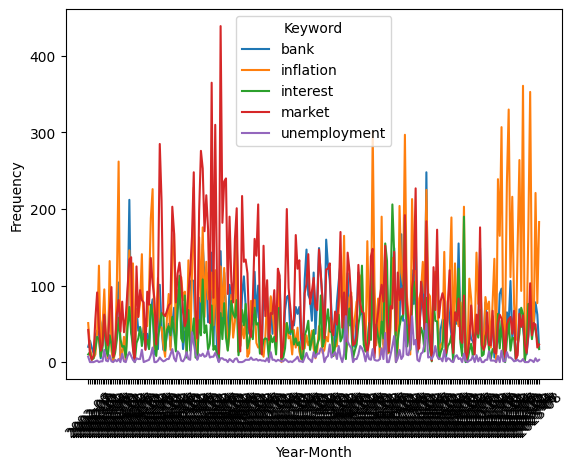

In [5]:
import seaborn as sns

graph = sns.lineplot( x=freq_ts_m["Year-Month"].astype(str),y=freq_ts_m["Frequency"], hue=freq_ts_m["Keyword"])
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)


# freq_ts_m['Year'] = freq_ts_m['Year-Month'].dt.year
# graph = sns.lineplot(x=freq_ts_m['Year'], y=freq_ts_m['Frequency'], hue=freq_ts_m['Keyword'])
# graph.set_xticks(freq_ts_m['Year'].unique())
# graph.set_xticklabels(freq_ts_m['Year'].unique(), rotation=45)

# plt.xlabel('Year')
# plt.ylabel('Frequency')
# plt.title('Frequency Over Time for Keywords')
# plt.legend()
# plt.grid(True)

# plt.show()

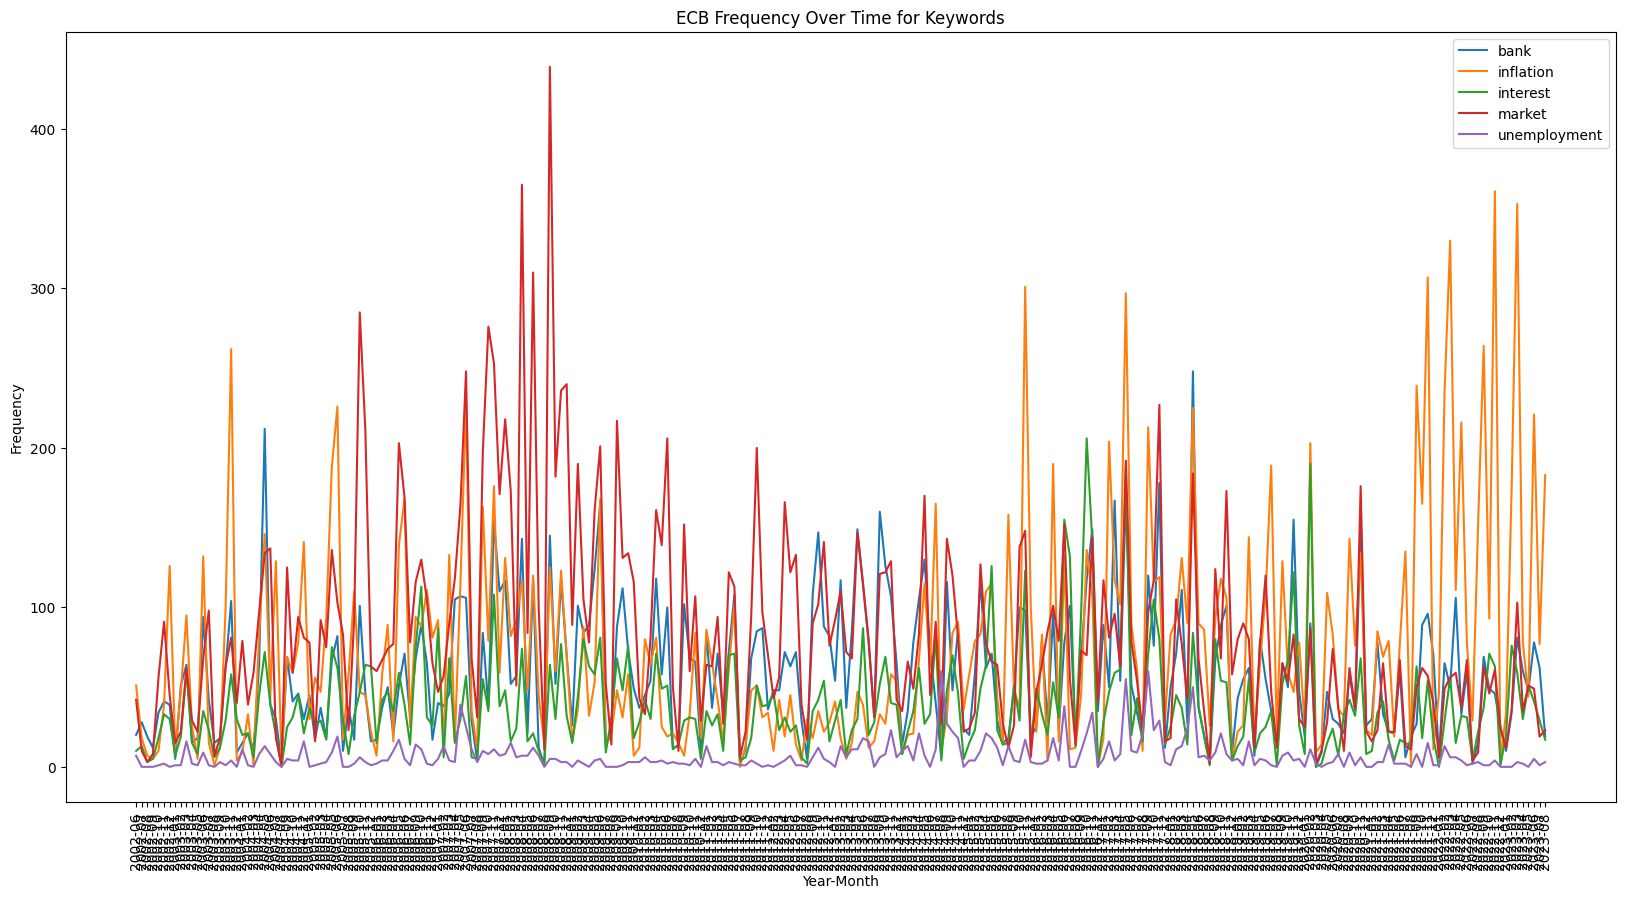

In [6]:
plt.figure(figsize=(20, 10))
for Keyword, group in freq_ts_m.groupby('Keyword'):
    plt.plot(group['Year-Month'].astype(str), group['Frequency'], label=Keyword)

plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title(f'{Body} Frequency Over Time for Keywords')
plt.legend()

plt.xticks(rotation=90)

plt.show()

In [7]:
gwalker = pyg.walk(freq_ts_m)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [8]:
freq_ts_m = freq_ts_m.pivot_table(index='Year-Month', columns='Keyword', values='Frequency')
print(freq_ts_m.head())

Keyword     bank  inflation  interest  market  unemployment
Year-Month                                                 
2002-06       20         51        10      42             7
2002-07       28         18        13      10             0
2002-08       19          7         3       3             0
2002-09       12          5         5       8             0
2002-10       34         10        18      56             1


In [9]:
plt.figure(figsize=(10, 6))
for keyword in freq_ts_m.columns:
    plt.plot(freq_ts_m['Year-Month'].astype(str), freq_ts_m[keyword], label=keyword)

plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Frequency Over Time for Keywords')
plt.legend()

KeyError: 'Year-Month'

<Figure size 1000x600 with 0 Axes>

In [ ]:
gwalker = pyg.walk(freq_ts_m)

In [ ]:
freq_ts_m.columns
freq_ts_m.reset_index(inplace=True)
print(freq_ts_m.head())

In [ ]:
energy = pd.read_csv('/Users/kylenabors/Documents/Database/Other Data/Energy Prices/US Energy CPI.csv')
energy["DATE"] = pd.to_datetime(energy["DATE"]).dt.to_period('M')
freq_ts_m = freq_ts_m.merge(energy, left_on='Year-Month', right_on='DATE', how='left')
print(freq_ts_m.head())
freq_ts_m.drop(columns=['DATE'], inplace=True)

In [ ]:
funds = pd.read_excel('/Users/kylenabors/Documents/Database/Other Data/FedFundsRate.xlsx', sheet_name='Monthly')
funds['Date Adjusted'] = funds['Date Adjusted'].dt.to_period(freq='M')
freq_ts_m = freq_ts_m.merge(funds, left_on='Year-Month', right_on='Date Adjusted', how='left')

In [ ]:
cpi = pd.read_excel('/Users/kylenabors/Documents/Database/Other Data/Urban Consumer CPI.xlsx', sheet_name='Monthly')
cpi['diff'] = cpi['Value'].diff()
print(cpi.head())
cpi["Year-Month"] = pd.to_datetime(cpi["Year-Month"]).dt.to_period('M')
freq_ts_m = freq_ts_m.merge(cpi, left_on='Year-Month', right_on='Year-Month', how='left')
freq_ts_m.drop(columns=['Date Adjusted'], inplace=True)
print(freq_ts_m.head())

In [ ]:
freq_ts_m.rename(columns={'Value_x': 'Energy CPI', 'Value_y': 'Fed Funds Rate', 'Value': 'CPI'}, inplace=True)
print(freq_ts_m.head())

In [ ]:
freq_ts_m.plot(x='Year-Month', y=["decrease", "unemployment", "crisis", "negative", "downward"])

In [ ]:
gwalker = pyg.walk(freq_ts_m)